In [1]:
import os
import pandas as pd
from shutil import copyfile,rmtree
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# getting the list of all train images
data = pd.read_csv("C://Users//almuhyaru//Downloads//state-farm-distracted-driver-detection//driver_imgs_list.csv", usecols = [1,2])
data.nunique(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   classname  22424 non-null  object
 1   img        22424 non-null  object
dtypes: object(2)
memory usage: 350.5+ KB


(classname       10
 img          22424
 dtype: int64,
 None)

In [3]:
# list of all classes
classes_list = data['classname'].unique()
classes_list

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

In [4]:
#dictionary containing all train data file names, class wise
train_data_files={}
for cls, image_name in data.values:
    key = cls
    if key in train_data_files:
        train_data_files[key].append(image_name)
    else:
        train_data_files[key] = [image_name]

# printing the size of dataset for each class
for key in train_data_files:
    print(key, ":", len(train_data_files[key]))

c0 : 2489
c1 : 2267
c2 : 2317
c3 : 2346
c4 : 2326
c5 : 2312
c6 : 2325
c7 : 2002
c8 : 1911
c9 : 2129


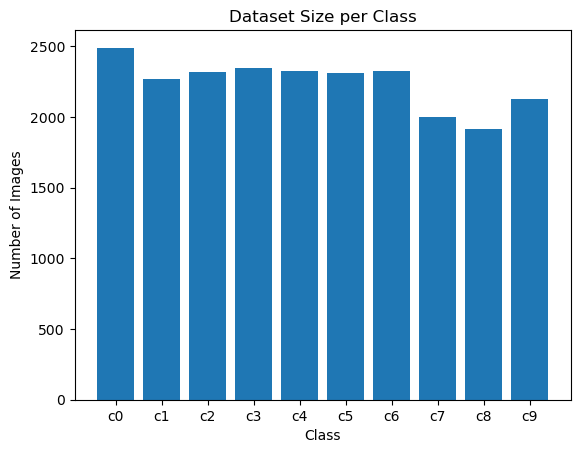

In [5]:
import matplotlib.pyplot as plt


class_names = list(train_data_files.keys())
class_sizes = [len(train_data_files[key]) for key in class_names]


plt.bar(class_names, class_sizes)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Dataset Size per Class')


plt.show()

The 10 classes to predict are:

c0: normal driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger

### Splittin, transofrming and generating image data


In [6]:
BATCH_SIZE = 128
IMAGE_SIZE = 224

In [7]:
TRAIN_DIR='C://Users//almuhyaru//Downloads//state-farm-distracted-driver-detection/imgs/train'
datagen = ImageDataGenerator(
        rescale = 1./255,
        validation_split = 0.2
)

training_data = datagen.flow_from_directory(TRAIN_DIR,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        subset='training',shuffle=False)

evaluating_data = datagen.flow_from_directory(TRAIN_DIR,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=BATCH_SIZE,
                                        subset='validation',shuffle=False)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


### Creating the model - CNN

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [9]:
model = keras.models.Sequential([
      Conv2D(16, (3,3), activation='relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)),
      MaxPooling2D(2, 2),
      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(1024, activation='relu'),
      Dense(10, activation='softmax')
])

In [10]:
# compile the model
model.compile(optimizer= Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [11]:
MIN_DELTA=0.005
EPOCHS=10
PATIENCE=2

In [12]:
# to stop training if no significant change in validation data accuracy
es = EarlyStopping(monitor = 'val_accuracy', patience = PATIENCE, min_delta = MIN_DELTA)

In [13]:
# fitting and generating the model
h= model.fit(
    training_data, 
    epochs = EPOCHS, 
    validation_data = evaluating_data,
    callbacks = [es]
         )

Epoch 1/10
141/141 [==============================] - 485s 3s/step - loss: 2.8955 - accuracy: 0.1079 - val_loss: 2.3085 - val_accuracy: 0.1038
Epoch 2/10
141/141 [==============================] - 340s 2s/step - loss: 2.3723 - accuracy: 0.1698 - val_loss: 2.1937 - val_accuracy: 0.3334
Epoch 3/10
141/141 [==============================] - 347s 2s/step - loss: 1.6905 - accuracy: 0.4330 - val_loss: 0.8496 - val_accuracy: 0.7193
Epoch 4/10
141/141 [==============================] - 340s 2s/step - loss: 0.4315 - accuracy: 0.8634 - val_loss: 0.2409 - val_accuracy: 0.9277
Epoch 5/10
141/141 [==============================] - 348s 2s/step - loss: 0.0709 - accuracy: 0.9817 - val_loss: 0.0457 - val_accuracy: 0.9891
Epoch 6/10
141/141 [==============================] - 365s 3s/step - loss: 0.0168 - accuracy: 0.9959 - val_loss: 0.0610 - val_accuracy: 0.9830
Epoch 7/10
141/141 [==============================] - 379s 3s/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0305 - val_accuracy: 0.9940

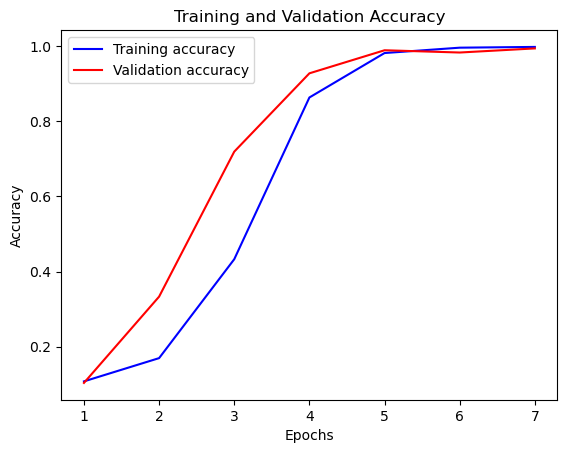

In [14]:
import matplotlib.pyplot as plt


# Get the training and validation accuracy from the history object
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

# Plot the training and validation accuracy
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
train_acc

[0.10789722949266434,
 0.16975979506969452,
 0.4329822361469269,
 0.8634007573127747,
 0.9816641807556152,
 0.9959315657615662,
 0.9979379177093506]

In [16]:
val_acc

[0.10377147793769836,
 0.3334077298641205,
 0.7192590832710266,
 0.9276947379112244,
 0.9890649318695068,
 0.9830394983291626,
 0.9939745664596558]

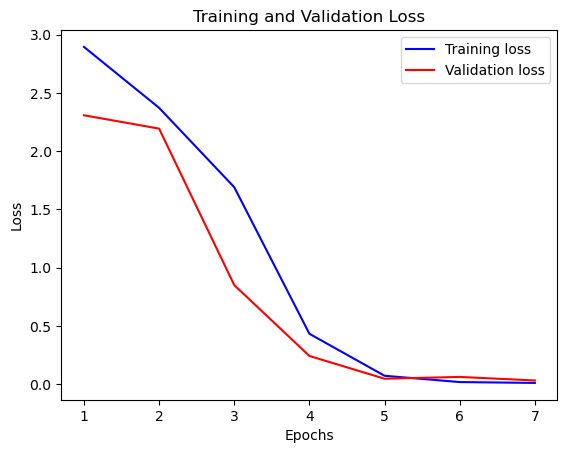

In [17]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Predict and load test data

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory

In [20]:
img_dir="C://Users//almuhyaru//Downloads//state-farm-distracted-driver-detection/imgs"

In [21]:
# transforming test data same as training data
test_data_gen = ImageDataGenerator(
    rescale = 1./225
)

test_data = test_data_gen.flow_from_directory(img_dir,
                          target_size = (IMAGE_SIZE, IMAGE_SIZE),
                          classes = ['test'],
                          shuffle = False,
                          batch_size = BATCH_SIZE)

Found 79726 images belonging to 1 classes.


In [22]:
predicted = model.predict(test_data)
predicted.shape

623/623 [==============================] - 1053s 2s/step


(79726, 10)

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels = evaluating_data.labels
predicted_labels = np.argmax(predicted, axis=1)[:evaluating_data.samples]

cm = confusion_matrix(true_labels, predicted_labels)


In [26]:
print(cm)

[[ 56  35  19  21  34  88  34  45 124  41]
 [ 45  22  26  24  38  88  32  48 100  30]
 [ 42  38  22  18  45 100  19  42 106  31]
 [ 50  35  26  15  38 104  29  42 109  21]
 [ 55  37  14  19  32  91  22  43 111  41]
 [ 39  32  29  18  33  86  35  32 126  32]
 [ 60  25  19  32  31  68  23  48 136  23]
 [ 31  31  11  21  29  73  22  36 111  35]
 [ 44  20  11  17  31  67  18  41  98  35]
 [ 36  27  27  31  27  82  19  44 111  21]]


In [27]:
class_labels = list(evaluating_data.class_indices.keys())
print(class_labels)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


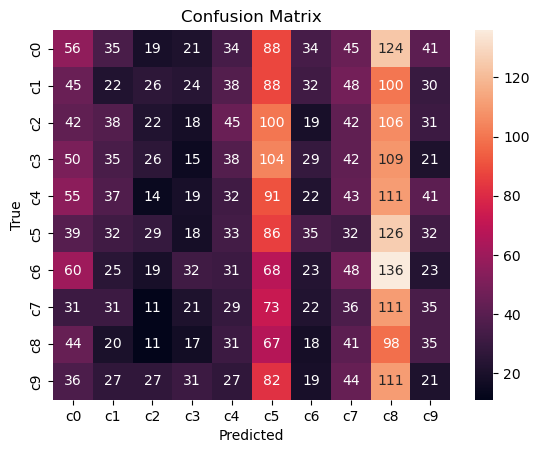

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

###  Loading the prediction in required format

In [ ]:
test_data_files = image_dataset_from_directory(
    'C://Users//almuhyaru//Downloads//state-farm-distracted-driver-detection/imgs/test',
     labels = None,
    label_mode=None,
)

In [ ]:
df = pd.DataFrame(predicted)
df.columns = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
filepath = [i.split('/')[-1] for i in test_data_files.file_paths]
df1 = pd.DataFrame(filepath)
df1.columns = ['img']
df = df1.join(df)
df.to_csv('output.csv',index=False)

In [ ]:
df.info()